In [67]:
import sys
import os
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', 500)

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\api_scraping")
    sys.path.append(module_path+"\\functions")

from get_user_data import *
import sqlite3

In [68]:
conn = sqlite3.connect("../../data/database/song_database.db")

In [69]:
dataset = pd.read_sql_query("SELECT * FROM songs", conn)

In [70]:
dataset.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

<Axes: xlabel='mode', ylabel='count'>

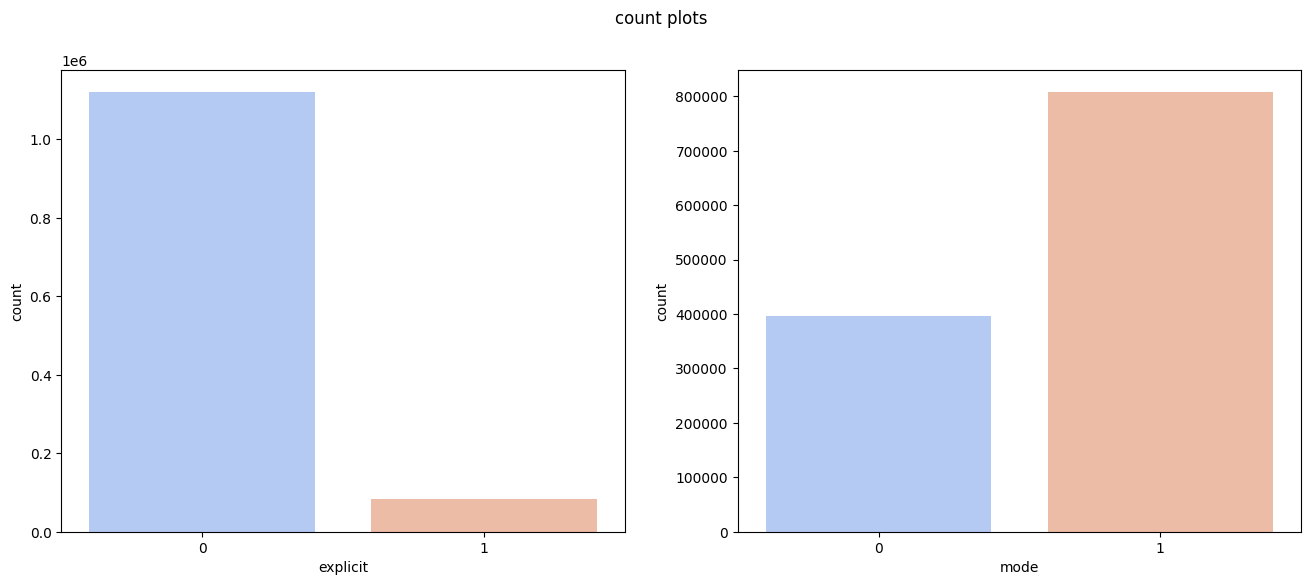

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('count plots')

sns.countplot(ax=axes[0],x='explicit',data=dataset,palette='coolwarm')
sns.countplot(ax=axes[1],x='mode',data=dataset,palette='coolwarm')

In [72]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'], errors='coerce')
dataset['year'] = dataset['release_date'].apply(lambda time: time.year)
dataset = dataset.dropna()

In [73]:
columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'year']
song_attributes = dataset[columns]

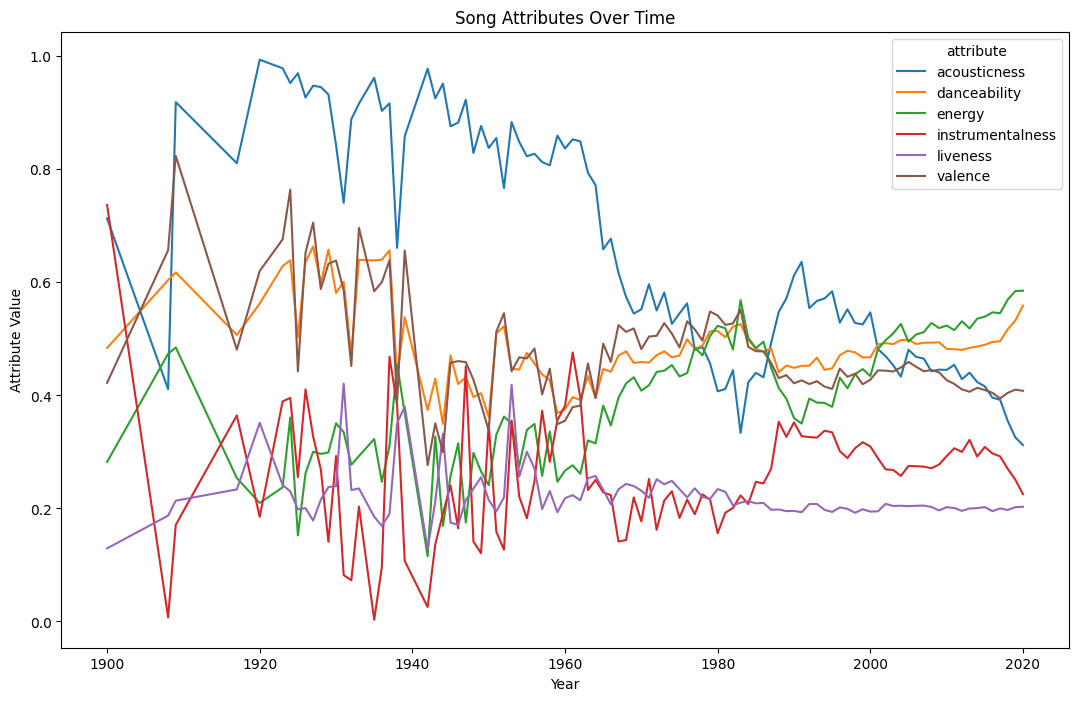

In [74]:
song_attributes_by_year = song_attributes.groupby('year').mean().reset_index()

# Melt the data so that each attribute has its own row
song_attributes_melted = song_attributes_by_year.melt(id_vars=['year'], var_name='attribute', value_name='value')
plt.figure(figsize=(13, 8))
# Create a line plot using Seaborn
sns.lineplot(data=song_attributes_melted, x='year', y='value', hue='attribute')

# Set the title and axis labels for the plot
plt.title('Song Attributes Over Time')
plt.xlabel('Year')
plt.ylabel('Attribute Value')


# Display the plot
plt.show()

C:\Users\jordi\AppData\Local\Temp\ipykernel_12096\2268356265.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

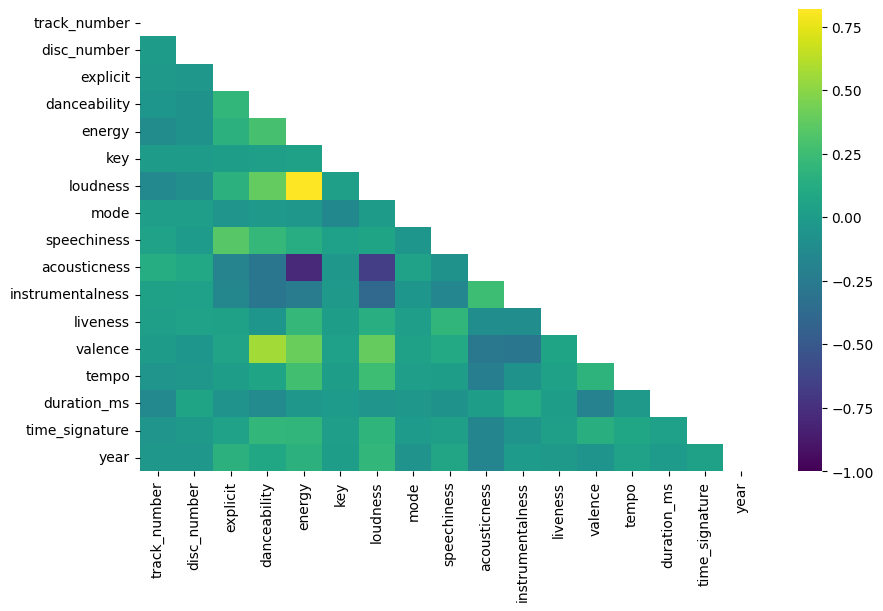

In [75]:
plt.figure(figsize=(10,6))

corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,vmin=-1,cmap='viridis',annot=False)

In [76]:
df = dataset.select_dtypes(np.number)
number_cols = list(df.columns)
df.dropna()

,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
0,1,1,0,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999.0
1,2,1,1,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999.0
2,3,1,0,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999.0
3,4,1,1,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999.0
4,5,1,0,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,2,1,0,0.264,0.966,5,-6.970,0,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014.0
1204021,3,1,0,0.796,0.701,11,-6.602,0,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014.0
1204022,4,1,0,0.785,0.796,9,-5.960,0,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014.0
1204023,5,1,0,0.665,0.856,6,-6.788,0,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014.0


### Standard Scaler

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X = scaler.fit_transform(df.values)

scaled_df = pd.DataFrame(scaled_X,
columns=df.columns)

### PCA

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(scaled_df)

pca_df = pca.transform(scaled_df)

In [79]:
from sklearn import metrics
dict1 = {}

### KMEANS

In [80]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, verbose=2)
kmeans.fit(pca_df)

e:\UOC\3r any\TFM\spotify_TFM\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 1189543.247715368.
Iteration 1, inertia 1020979.4356621711.
Iteration 2, inertia 997518.3462701617.
Iteration 3, inertia 988485.1147169024.
Iteration 4, inertia 983913.518121053.
Iteration 5, inertia 981388.5313299994.
Iteration 6, inertia 979951.8195818332.
Iteration 7, inertia 979133.6725265221.
Iteration 8, inertia 978643.0288879154.
Iteration 9, inertia 978328.5430253084.
Iteration 10, inertia 978121.8142039777.
Iteration 11, inertia 977972.6457192614.
Iteration 12, inertia 977857.2116663882.
Iteration 13, inertia 977761.3925867607.
Iteration 14, inertia 977675.9396319517.
Iteration 15, inertia 977597.7629293996.
Converged at iteration 15: center shift 0.00022572578927365985 within tolerance 0.0002522710607806107.
Initialization complete
Iteration 0, inertia 1194243.5616640532.
Iteration 1, inertia 1049639.9424701133.
Iteration 2, inertia 1017279.78574218.
Iteration 3, inertia 1005712.2109591991.
Iteration 4, inertia 999862.9364037215.
I

KMeans(verbose=2)

In [81]:
spotify_dataKmeans = dataset.copy()
spotify_dataKmeans['cluster_label'] = kmeans.predict(pca_df)
x = metrics.calinski_harabasz_score(pca_df, spotify_dataKmeans['cluster_label'])
print(x)
#kmeans
dict1['kmeans']=x

917189.1491932699


### BIRCH

In [82]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=20)
brc.fit(pca_df)
spotify_dataBrich = dataset.copy()
spotify_dataBrich['cluster_label'] = brc.predict(pca_df)
x = metrics.calinski_harabasz_score(pca_df, spotify_dataBrich['cluster_label'])
print(x) #BRICH
dict1['BRICH']=x

299591.79974953376


### Mini-Batch Kmeans

In [83]:
from sklearn.cluster import MiniBatchKMeans
minikmeans = MiniBatchKMeans(n_clusters=6,random_state=23,batch_size=32)

minikmeans.fit(pca_df)
spotify_minikmeans = dataset.copy()
spotify_minikmeans['cluster_label'] = minikmeans.predict(pca_df)
x = metrics.calinski_harabasz_score(pca_df, spotify_minikmeans['cluster_label'])
print(x) #minibatch kmeans
dict1['minibatch kmeans']=x

e:\UOC\3r any\TFM\spotify_TFM\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



907919.9784665116


### Fuzzy C Mean

In [84]:
from fcmeans import FCM
fcm = FCM(n_clusters=8)
fcm.fit(pca_df)
spotify_dataFuzzy = dataset.copy()
spotify_dataFuzzy['cluster_label'] = fcm.predict(pca_df)
x=metrics.calinski_harabasz_score(pca_df, spotify_dataFuzzy['cluster_label'])
print(x) #fuzzy c mean
dict1['fuzzy c']=x

883630.4713059554


### Gausian Mixture Model

In [85]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=7, random_state=23)
gm.fit(pca_df)
spotify_gm = dataset.copy()
spotify_gm['cluster_label'] = gm.predict(pca_df)
x=metrics.calinski_harabasz_score(pca_df, spotify_gm['cluster_label'])
print(x)
#Gausian Mixture
dict1['Gausian Mixture']=x

706430.1942350538


### Accuracy

In [86]:
m = pd.DataFrame(list(dict1.items()),columns = ['cluster','score'])
m.set_index('cluster',inplace=True)
m

,score
cluster,
kmeans,917189.149193
BRICH,299591.799750
minibatch kmeans,907919.978467
fuzzy c,883630.471306
Gausian Mixture,706430.194235


In [87]:
import plotly.express as px
fig = px.bar(m, orientation='h')
fig.show()